# Human Activity Recongition Models - UCI Repository

In [78]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils import shuffle
from sklearn import linear_model

# test  = shuffle(test)
# train = shuffle(train)

In [79]:
trainX = pd.read_table('C:/Users/gokul/Documents/Projects/human Activity/X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('C:/Users/gokul/Documents/Projects/human Activity/y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("C:/Users/gokul/Documents/Projects/human Activity/X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('C:/Users/gokul/Documents/Projects/human Activity/y_test.txt',delim_whitespace=True,header=None)
# one = [trainX,testX]
# two = [trainy,testy]
# X = pd.concat(one)
# Y = pd.concat(two)

# X = shuffle(X)
# Y = shuffle(Y)
# y_train = trainy
# y_test = testy
# y = np.array(y_train).ravel()

dickey = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING"}

In [80]:
mu = trainX.mean(axis=0)
mu1 = testX.mean(axis=0)
stdv = trainX.std(axis = 0)
stdv1 = testX.std(axis = 0)

X_train = (trainX - mu)/stdv
X_test = (testX - mu1)/stdv1
y_train = trainy
y_test = testy
y = np.array(y_train).ravel()

dickey = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING"}

## Decision Tree

In [81]:
X_test.shape

(2947, 561)

Training Accuracy of Decision Tree: 0.9351196953210011
Testing Accuracy of Decision Tree: 0.828978622327791


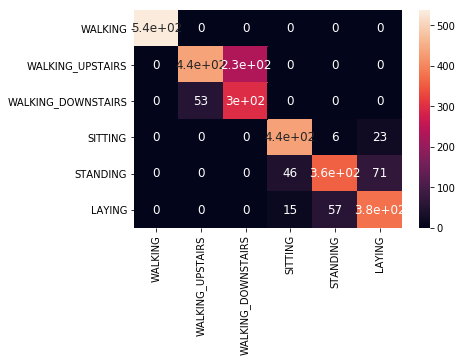

In [82]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
rank_classifier.fit(X_train,y)
#print(type(rank_classifier))
Predictions_test = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)
TrainAccuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)
TestAccuracy = accuracy_score(y_true = y_test, y_pred = Predictions_test)

print("Training Accuracy of Decision Tree: {}".format(TrainAccuracy))
print("Testing Accuracy of Decision Tree: {}".format(TestAccuracy))

yy = list(map(str, Predictions_test))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

## K Neearest Neighbors

In [ ]:
from sklearn import neighbors
Accuracy_KNN = np.array([])
rangeli = np.array(list(range(3,15)))
for i in rangeli:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y)
    predicted_knn = knn.predict(X_test)
    Accuracy = accuracy_score(y_true = y_test, y_pred = predicted_knn)
    Accuracy_KNN = np.append(Accuracy_KNN, Accuracy)

plt.plot(rangeli, Accuracy_KNN)
plt.show()
print("Optimal K value is {}".format(rangeli[np.argmax(Accuracy_KNN)]))
print("Accuracy of Optimum K value is {}".format(np.max(Accuracy_KNN)))

## Gaussian Naive Bayes

Training Accuracy of Gaussian Naive Bayes:  0.7461915125136017
Testing Accuracy of Gaussian Naive Bayes: 0.5721072276891754


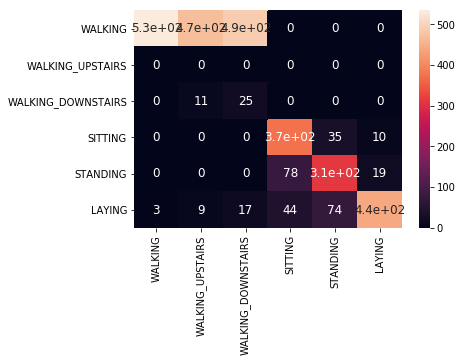

In [84]:
from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()
mnb.fit(X_train, y)
predicted_mnb = mnb.predict(X_test)
predicted_train = mnb.predict(X_train)
#Accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
Accuracy_test = accuracy_score(y_true = y_test, y_pred = predicted_mnb)
Accuracyl_train = accuracy_score(y_true = y_train, y_pred = predicted_train)
print("Training Accuracy of Gaussian Naive Bayes:  {}".format(Accuracyl_train))
print("Testing Accuracy of Gaussian Naive Bayes: {}".format(Accuracy_test))

yy = list(map(str, predicted_mnb))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
df_cm.index = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
#print(df_cm)
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

In [85]:
df_cm

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,534,471,490,0,0,0
WALKING_UPSTAIRS,0,0,0,0,0,0
WALKING_DOWNSTAIRS,0,11,25,0,0,0
SITTING,0,0,0,374,35,10
STANDING,0,0,0,78,311,19
LAYING,3,9,17,44,74,442


## Logistic Regression

In [86]:
cli = [1,0.5,0.1,0.01,0.003,0.0003]
trainacc = np.array([])
testacc = np.array([])
for j in cli:
    LRmod = linear_model.LogisticRegression(penalty='l1', C=j)
    LRmod.fit(X_train,y)
    pred = LRmod.predict(X_test)
    pred1 = LRmod.predict(X_train)
    testac = accuracy_score(y_true = y_test, y_pred = pred)
    trainac = accuracy_score(y_true = y_train, y_pred = pred1)
    trainacc = np.append(trainacc,trainac)
    testacc = np.append(testacc,testac)
    print("Training Accuracy for penalty {}: {}".format(j,trainac))
    print("Testing Accuracy for penalty {}: {}".format(j,testac))

print("========================================================")
val = np.subtract(trainacc,testacc)    
print("Optimum Penalty value: {}".format(cli[np.argmin(val)]))
print("Maximum Testing Accuracy: {}".format(testacc[np.argmin(val)]))
print("Maximum Training Accuracy: {}".format(trainacc[np.argmin(val)]))

Training Accuracy for penalty 1: 0.9952393906420022
Testing Accuracy for penalty 1: 0.9643705463182898
Training Accuracy for penalty 0.5: 0.9933351468988031
Testing Accuracy for penalty 0.5: 0.9643705463182898
Training Accuracy for penalty 0.1: 0.986126224156692
Testing Accuracy for penalty 0.1: 0.9589412962334578
Training Accuracy for penalty 0.01: 0.9460010881392819
Testing Accuracy for penalty 0.01: 0.9317950458092976
Training Accuracy for penalty 0.003: 0.9076441784548422
Testing Accuracy for penalty 0.003: 0.9161859518154055
Training Accuracy for penalty 0.0003: 0.16675734494015235
Testing Accuracy for penalty 0.0003: 0.168306752629793
Optimum Penalty value: 0.003
Maximum Testing Accuracy: 0.9161859518154055
Maximum Training Accuracy: 0.9076441784548422


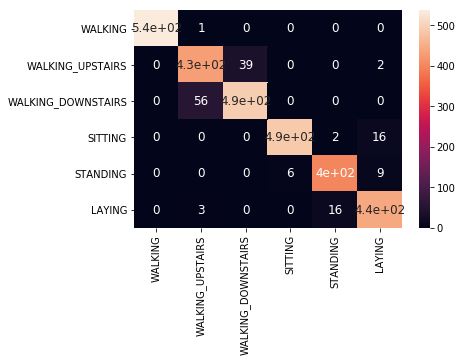

In [87]:
LRmod = linear_model.LogisticRegression(penalty='l1', C=0.03)
LRmod.fit(X_train,y)
pred = LRmod.predict(X_test)
yy = list(map(str, pred))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
df_cm.index = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]

#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

In [88]:
df_cm

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,537,1,0,0,0,0
WALKING_UPSTAIRS,0,431,39,0,0,2
WALKING_DOWNSTAIRS,0,56,493,0,0,0
SITTING,0,0,0,490,2,16
STANDING,0,0,0,6,402,9
LAYING,0,3,0,0,16,444


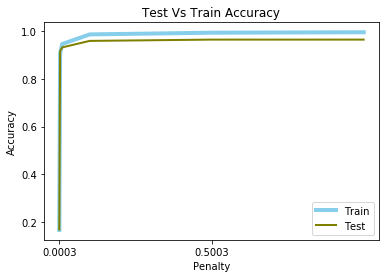

In [89]:
# multiple line plot
plt.plot( cli,trainacc , marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='Train')
plt.plot( cli,testacc ,marker='', color='olive', linewidth=2, label='Test')
plt.xticks(np.arange(min(cli), max(cli), 0.5))
plt.title('Test Vs Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Penalty')
plt.legend()
plt.show()

## Support Vector Machine

In [131]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm = clf.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predsvm)
predsvm = clf.predict(X_train)
accuracy_score(y_true = y_train, y_pred = predsvm)

## Neural Network 


In [90]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1)
clf.fit(X_train,y)

MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Training Accuracy in Neural Network: 0.9737486398258978
Testing Accuracy in Neural Network: 0.9541907024092298


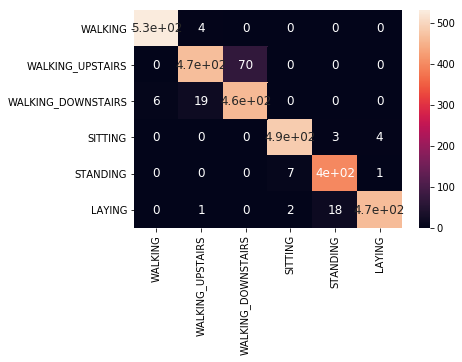

In [91]:
pred = clf.predict(X_test)
predt = clf.predict(X_train)
TeAccuracy = accuracy_score(y_true = y_test, y_pred = pred)
TrAccuracy = accuracy_score(y_true = y_train, y_pred = predt)

print("Training Accuracy in Neural Network: {}".format(TrAccuracy))
print("Testing Accuracy in Neural Network: {}".format(TeAccuracy))

yy = list(map(str, pred))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
df_cm.index = ["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

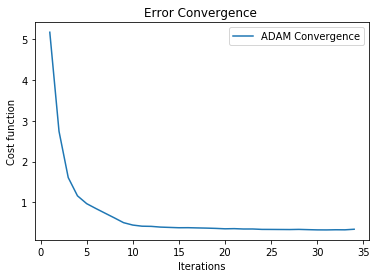

In [92]:
X1 = np.linspace(1, clf.n_iter_  , clf.n_iter_ )

plt.plot(X1 , clf.loss_curve_ , label = 'ADAM Convergence' )
plt.title('Error Convergence ')
plt.ylabel('Cost function')
plt.xlabel('Iterations')
plt.legend()
plt.show()

In [93]:
df_cm

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,531,4,0,0,0,0
WALKING_UPSTAIRS,0,467,70,0,0,0
WALKING_DOWNSTAIRS,6,19,462,0,0,0
SITTING,0,0,0,487,3,4
STANDING,0,0,0,7,399,1
LAYING,0,1,0,2,18,466
